# LCRTest1

## Setup and Data

In [41]:
# Imports functions into the program
import os
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#These are imported specifically for the use of the histogram.
from matplotlib import colors
from matplotlib.ticker import PercentFormatter

#Imported for categorization of the Sources
from fractional_variability import fvar
from fermi_catalog import select_bll, select_fsrq, select_bcu

In [73]:
table = "new_db_Feb2023.csv"
opened = open(table,"r")
readed = pd.read_csv(table, sep=",", na_filter=True)
readed = readed.fillna(-3333)

cadence = 'daily'
cadence_df = readed.loc[(readed['cadence'] == cadence) #& \
                        # (readed['ts2'] <= 4.) & \
                        # (readed['photon_flux_error2'] <  readed['photon_flux2'])
                        ]
#cadence_df.loc[cadence_df['ts2'] <= 9., 'photon_flux2'] = -3333
cadence_df.loc[cadence_df['ts2'] <= 4., ['photon_flux2', 'photon_flux_error2']] = -3333
#Jorge: Set as -3333 all points with an error larger than the flux
cadence_df.loc[cadence_df['photon_flux_error2'] > cadence_df['photon_flux2'], ['photon_flux2', 'photon_flux_error2']] = -3333
#Jorge: Set cuts to remove possible outliers due to bad convergence of a bin
cadence_df.loc[cadence_df['photon_flux2'] > 1e-4, ['photon_flux2', 'photon_flux_error2']] = -3333
cadence_df.loc[cadence_df['photon_flux2'] < 1e-10, ['photon_flux2', 'photon_flux_error2']] = -3333
print(cadence_df)

TSTART = np.amin(cadence_df['tmin'])
TSTOP = np.amax(cadence_df['tmax'])

names = np.unique(readed['source_name']) #.drop_duplicates(subset=['source_name'], inplace=False)#[1]

         Unnamed: 0        source_name cadence       tmin       tmax  \
0                 0  4FGL J0001.2-0747   daily  239587201  239846401   
1                 1  4FGL J0001.5+2113   daily  239587201  239846401   
2                 2  4FGL J0003.3-1928   daily  239587201  239846401   
3                 3  4FGL J0004.3+4614   daily  239587201  239846401   
4                 4  4FGL J0004.4-4737   daily  239587201  239846401   
...             ...                ...     ...        ...        ...   
4131220     4131220  4FGL J2358.0-4601   daily  698889601  699148801   
4131221     4131221  4FGL J2358.3-1021   daily  698889601  699148801   
4131222     4131222  4FGL J2358.3+3830   daily  698889601  699148801   
4131223     4131223  4FGL J2359.0+3922   daily  698889601  699148801   
4131224     4131224  4FGL J2359.2-3134   daily  698889601  699148801   

         photon_flux2  photon_flux_error2  photon_index2  return_code2  \
0       -3.333000e+03       -3.333000e+03           2.18     

In [74]:
fsrq_df = select_fsrq()
fsrq_names = fsrq_df['Source_Name']

fsrq_fmatrix = []
fsrq_fractionalflux = []
fsrq_nanbins = []
fsrq_nanbinsmatrix = []
for i, fsrq in enumerate(fsrq_names):
    print(i, fsrq)
    source_array = cadence_df.loc[cadence_df['source_name'] == fsrq]
    averageflux = np.mean(source_array[source_array['photon_flux2']!=-3333]['photon_flux2'])
    
    flux = np.array(source_array[source_array['photon_flux2']!=-3333]['photon_flux2'])
    flux_err = np.array(source_array[source_array['photon_flux2']!=-3333]['photon_flux_error2'])
    var, var_err = fvar(flux, flux_err)

    factors = source_array['photon_flux2']/averageflux
    fsrq_nanbins.append(len(source_array[source_array['photon_flux2']== -3333]))
    fsrq_nanbinsmatrix.append(np.array(source_array['photon_flux2'] == -3333))
    fsrq_fmatrix.append(factors.tolist())
    fsrq_fractionalflux.append([fsrq, averageflux, var, var_err])

fsrq_fmatrix = np.array(fsrq_fmatrix)
fsrq_nanbinsmatrix = np.array(fsrq_nanbinsmatrix)

-----------------------------
Selecting FSRQ type blazars
Total number of variable objects: 572
0 4FGL J0001.5+2113
1 4FGL J0004.3+4614
2 4FGL J0004.4-4737
3 4FGL J0005.9+3824
4 4FGL J0010.6+2043
5 4FGL J0010.6-3025
6 4FGL J0011.4+0057
7 4FGL J0016.2-0016
8 4FGL J0017.5-0514
9 4FGL J0019.6+7327
10 4FGL J0023.7-6820
11 4FGL J0023.7+4457
12 4FGL J0024.7+0349
13 4FGL J0028.4+2001
14 4FGL J0030.3-4224
15 4FGL J0038.2-2459
16 4FGL J0043.8+3425
17 4FGL J0044.2-8424
18 4FGL J0045.1-3706
19 4FGL J0047.9+2233
20 4FGL J0050.0-5736
21 4FGL J0050.4-0452
22 4FGL J0051.1-0648
23 4FGL J0051.5-4220
24 4FGL J0058.0-0539
25 4FGL J0058.4+3315
26 4FGL J0102.4+4214
27 4FGL J0102.8+5824
28 4FGL J0104.8-2416
29 4FGL J0108.6+0134
30 4FGL J0109.7+6133
31 4FGL J0112.0-6634
32 4FGL J0112.8+3208
33 4FGL J0113.1-3553
34 4FGL J0113.4+4948
35 4FGL J0115.1-0129
36 4FGL J0116.0-1136
37 4FGL J0117.8-2109
38 4FGL J0118.9-2141
39 4FGL J0126.0-2221
40 4FGL J0128.5+4440
41 4FGL J0132.7-1654
42 4FGL J0133.1-5201
43 4FGL J01

In [75]:
bll_df = select_bll()
bll_names = bll_df['Source_Name']

bll_fmatrix = []
bll_fractionalflux = []
bll_nanbins = []
bll_nanbinsmatrix = []
for i, bll in enumerate(bll_names):
    # print(i, bll)
    source_array = cadence_df.loc[cadence_df['source_name'] == bll]
    averageflux = np.mean(source_array[source_array['photon_flux2']!=-3333]['photon_flux2'])
    
    flux = np.array(source_array[(source_array['photon_flux2']!=-3333) & (source_array['photon_flux_error2']!=-3333)]['photon_flux2'])
    flux_err = np.array(source_array[(source_array['photon_flux2']!=-3333) & (source_array['photon_flux_error2']!=-3333)]['photon_flux_error2'])
    var, var_err = fvar(flux, flux_err)

    factors = source_array['photon_flux2']/averageflux
    bll_nanbins.append(len(source_array[source_array['photon_flux2']==-3333]))
    bll_nanbinsmatrix.append(np.array(source_array['photon_flux2'] == -3333))
    bll_fmatrix.append(factors.tolist())
    bll_fractionalflux.append([bll, averageflux, var, var_err])

bll_fmatrix = np.array(bll_fmatrix)
bll_nanbinsmatrix = np.array(bll_nanbinsmatrix)


-----------------------------
Selecting BL Lac type blazars
Total number of variable objects: 477


In [76]:
bcu_df = select_bcu()
bcu_names = bcu_df['Source_Name']

bcu_fmatrix = []
bcu_fractionalflux = []
bcu_nanbins = []
bcu_nanbinsmatrix = []
for i, bcu in enumerate(bcu_names):
    # print(i, bcu)
    source_array = cadence_df.loc[cadence_df['source_name'] == bcu]
    averageflux = np.mean(source_array[source_array['photon_flux2']!=-3333]['photon_flux2'])
    
    flux = np.array(source_array[(source_array['photon_flux2']!=-3333) & (source_array['photon_flux_error2']!=-3333)]['photon_flux2'])
    flux_err = np.array(source_array[(source_array['photon_flux2']!=-3333) & (source_array['photon_flux_error2']!=-3333)]['photon_flux_error2'])
    var, var_err = fvar(flux, flux_err)

    factors = source_array['photon_flux2']/averageflux
    bcu_nanbins.append(len(source_array[source_array['photon_flux2']==-3333]))
    bcu_nanbinsmatrix.append(np.array(source_array['photon_flux2'] == -3333))
    bcu_fmatrix.append(factors.tolist())
    bcu_fractionalflux.append([bll, averageflux, var, var_err])

bcu_fmatrix = np.array(bcu_fmatrix)
bcu_nanbinsmatrix = np.array(bcu_nanbinsmatrix)


-----------------------------
Selecting unknown type blazars
Total number of variable objects: 364


In [77]:
# We want to express each source as a point on a plot of Duration vs Average Flux
# To do this, we want to note the total duration in the flaring state
# I'll write a function that takes an array of blazars, using the functions Michel made, and calculates the average flux of those points.
# Each point noted down will be stored in an array, along with the average flux of each state.

In [8]:
fmatrix = []
fractionalflux = []
for i, name in enumerate(names):
    print(i, name)
    source_array = cadence_df.loc[cadence_df['source_name'] == name]
    averageflux = np.nanmean(source_array['photon_flux2'])
    flux = np.array(source_array['photon_flux2'])
    flux_err = np.array(source_array['photon_flux_error2'])

    factors = flux/averageflux
    fmatrix.append(factors.tolist())
    fractionalflux.append([name,factors,averageflux,flux,flux_err])
# pd.DataFrame(fractionalflux)

fmatrix = np.array(fmatrix)
print(fmatrix.shape)

0 4FGL J0001.2-0747
1 4FGL J0001.5+2113
2 4FGL J0003.3-1928
3 4FGL J0004.3+4614
4 4FGL J0004.4-4001
5 4FGL J0004.4-4737
6 4FGL J0005.9+3824
7 4FGL J0007.7+4008
8 4FGL J0009.1-5012
9 4FGL J0009.3+5030
10 4FGL J0010.6+2043
11 4FGL J0010.6-3025
12 4FGL J0011.4+0057
13 4FGL J0014.1+1910
14 4FGL J0014.3-0500
15 4FGL J0014.9+3212
16 4FGL J0016.2-0016
17 4FGL J0017.0-0649
18 4FGL J0017.5-0514
19 4FGL J0019.2-5640
20 4FGL J0019.6+7327
21 4FGL J0021.5-2552
22 4FGL J0021.9-5140
23 4FGL J0022.5+0608
24 4FGL J0023.7+4457
25 4FGL J0023.7-6820
26 4FGL J0024.4+4647
27 4FGL J0024.7+0349
28 4FGL J0025.7-4801
29 4FGL J0028.4+2001
30 4FGL J0029.0-7044
31 4FGL J0030.2-1647
32 4FGL J0030.3-4224
33 4FGL J0030.6-0212
34 4FGL J0032.3-5522
35 4FGL J0033.5-1921
36 4FGL J0033.9+3858
37 4FGL J0034.0-4116
38 4FGL J0035.2+1514
39 4FGL J0035.8+6131
40 4FGL J0035.9+5950
41 4FGL J0036.9+1832
42 4FGL J0037.8+1239
43 4FGL J0038.2-2459
44 4FGL J0039.1+4330
45 4FGL J0043.8+3425
46 4FGL J0044.2-8424
47 4FGL J0045.1-3706
48

In [9]:
def Esras(source_array):
    fmatrix = []
    fractionalflux = []
    for i, name in enumerate(names):
        print(i, name)
        source_array = cadence_df.loc[cadence_df['source_name'] == name]
        averageflux = np.nanmean(source_array['photon_flux2'])
        flux = np.array(source_array['photon_flux2'])
        flux_err = np.array(source_array['photon_flux_error2'])

        factors = flux/averageflux
        fmatrix.append(factors.tolist())
        fractionalflux.append([name,factors,averageflux,flux,flux_err])
    # pd.DataFrame(fractionalflux)

    fmatrix = np.array(fmatrix)
    print(fmatrix.shape)
    return fmatrix

In [78]:
def flare_detector(name,dataframe):
    final = [0,0,0]
    k=0
    temp =[]
    temp_err=[]
    duration = []
    average=[]
    #print(cadence_df)
    sourcematrix = dataframe.loc[dataframe['source_name'] == name].reset_index(drop=True)
    #print(sourcematrix)
    fluxmatrix = sourcematrix[sourcematrix['photon_flux2']!=-3333]['photon_flux2'].reset_index(drop=True)
    #print(fluxmatrix)
    averageflux = np.mean(sourcematrix[sourcematrix['photon_flux2']!=-3333]['photon_flux2'])
    errormatrix = sourcematrix[sourcematrix['photon_flux_error2']!=-3333]['photon_flux_error2'].reset_index(drop=True)
    #print(averageflux)
    #print(fluxmatrix)
    boolmatrix = fluxmatrix/averageflux > 1
    
    boolmatrix = boolmatrix.reset_index(drop=True)
    #print(boolmatrix)
    for i in range(len(fluxmatrix)):
        #print(len(fluxmatrix))
        if boolmatrix[i] == True:
            temp.append(fluxmatrix[i])
            temp_err.append(errormatrix[i])
            #print('baba')
        elif len(temp) != 0:
            #print('something')
            if i != 0:
                duration = ((len(temp)))
                average = np.nanmean(temp)
                temp = []
                final = np.vstack([final,[duration,average,np.nanmean(temp_err)]])
                temp_err = []
                #print('bobo')
        else:
            #print('no flares detected.')
            final = np.vstack([final,[0,0,0]])

            
    #print(final)
    return final

In [79]:

fsrq_flares = [0,0,0]
for i,name in enumerate(fsrq_names):
    print(i,name) 
    #print(flare_detector(name,cadence_df))
    fsrq_flares = np.vstack([fsrq_flares,flare_detector(name,cadence_df)])

print(fsrq_flares)


0 4FGL J0001.5+2113
1 4FGL J0004.3+4614
2 4FGL J0004.4-4737
3 4FGL J0005.9+3824
4 4FGL J0010.6+2043
5 4FGL J0010.6-3025
6 4FGL J0011.4+0057
7 4FGL J0016.2-0016
8 4FGL J0017.5-0514
9 4FGL J0019.6+7327
10 4FGL J0023.7-6820
11 4FGL J0023.7+4457
12 4FGL J0024.7+0349
13 4FGL J0028.4+2001
14 4FGL J0030.3-4224
15 4FGL J0038.2-2459
16 4FGL J0043.8+3425
17 4FGL J0044.2-8424
18 4FGL J0045.1-3706
19 4FGL J0047.9+2233
20 4FGL J0050.0-5736
21 4FGL J0050.4-0452
22 4FGL J0051.1-0648
23 4FGL J0051.5-4220
24 4FGL J0058.0-0539
25 4FGL J0058.4+3315
26 4FGL J0102.4+4214
27 4FGL J0102.8+5824
28 4FGL J0104.8-2416
29 4FGL J0108.6+0134
30 4FGL J0109.7+6133
31 4FGL J0112.0-6634
32 4FGL J0112.8+3208
33 4FGL J0113.1-3553
34 4FGL J0113.4+4948
35 4FGL J0115.1-0129
36 4FGL J0116.0-1136
37 4FGL J0117.8-2109
38 4FGL J0118.9-2141
39 4FGL J0126.0-2221
40 4FGL J0128.5+4440
41 4FGL J0132.7-1654
42 4FGL J0133.1-5201
43 4FGL J0134.3-3842
44 4FGL J0137.0+4751
45 4FGL J0137.6-2430
46 4FGL J0145.0-2732
47 4FGL J0152.2+2206
48

In [80]:

bll_flares = [0,0,0]
for i,name in enumerate(bll_names):
    print(i,name) 
    #print(flare_detector(name,cadence_df))
    bll_flares = np.vstack([bll_flares,flare_detector(name,cadence_df)])

pd.DataFrame(bll_flares)

0 4FGL J0001.2-0747
1 4FGL J0009.3+5030
2 4FGL J0014.1+1910
3 4FGL J0021.5-2552
4 4FGL J0021.9-5140
5 4FGL J0022.5+0608
6 4FGL J0029.0-7044
7 4FGL J0030.2-1647
8 4FGL J0033.5-1921
9 4FGL J0035.2+1514
10 4FGL J0035.9+5950
11 4FGL J0037.8+1239
12 4FGL J0045.3+2128
13 4FGL J0045.7+1217
14 4FGL J0047.0+5657
15 4FGL J0047.9+3947
16 4FGL J0049.7+0237
17 4FGL J0050.7-0929
18 4FGL J0051.2-6242
19 4FGL J0056.3-0935
20 4FGL J0056.4-2118
21 4FGL J0058.0-3233
22 4FGL J0100.3+0745
23 4FGL J0103.5+5337
24 4FGL J0103.8+1321
25 4FGL J0105.1+3929
26 4FGL J0107.4+0334
27 4FGL J0112.1+2245
28 4FGL J0114.8+1326
29 4FGL J0115.8+2519
30 4FGL J0120.4-2701
31 4FGL J0124.8-0625
32 4FGL J0125.3-2548
33 4FGL J0127.2+0324
34 4FGL J0131.1+6120
35 4FGL J0136.5+3906
36 4FGL J0137.9+5814
37 4FGL J0138.0+2247
38 4FGL J0141.4-0928
39 4FGL J0143.7-5846
40 4FGL J0144.6+2705
41 4FGL J0152.6+0147
42 4FGL J0153.9+0823
43 4FGL J0156.8-4744
44 4FGL J0156.9-5301
45 4FGL J0158.5-3932
46 4FGL J0159.5+1046
47 4FGL J0202.7+4204
48

,0,1,2
0,0.0,0.000000e+00,0.000000e+00
1,0.0,0.000000e+00,0.000000e+00
2,1.0,1.650000e-07,6.920000e-08
3,0.0,0.000000e+00,0.000000e+00
4,0.0,0.000000e+00,0.000000e+00
...,...,...,...
90599,0.0,0.000000e+00,0.000000e+00
90600,0.0,0.000000e+00,0.000000e+00
90601,3.0,1.126667e-07,7.753333e-08
90602,0.0,0.000000e+00,0.000000e+00


In [81]:
bcu_flares = [0,0,0]
for i,name in enumerate(bcu_names):
    print(i,name) 
    #print(flare_detector(name,cadence_df))
    bcu_flares = np.vstack([bcu_flares,flare_detector(name,cadence_df)])

pd.DataFrame(bcu_flares)

0 4FGL J0003.3-1928
1 4FGL J0007.7+4008
2 4FGL J0014.3-0500
3 4FGL J0014.9+3212
4 4FGL J0017.0-0649
5 4FGL J0019.2-5640
6 4FGL J0024.4+4647
7 4FGL J0025.7-4801
8 4FGL J0030.6-0212
9 4FGL J0032.3-5522
10 4FGL J0033.9+3858
11 4FGL J0034.0-4116
12 4FGL J0035.8+6131
13 4FGL J0036.9+1832
14 4FGL J0039.1+4330
15 4FGL J0055.1-1219
16 4FGL J0056.6-5317
17 4FGL J0111.5-2546
18 4FGL J0114.0+6418
19 4FGL J0115.1+2622
20 4FGL J0118.7-0848
21 4FGL J0140.6+8736
22 4FGL J0143.1-3622
23 4FGL J0146.0-6746
24 4FGL J0152.2+3714
25 4FGL J0156.5+3914
26 4FGL J0159.3-4523
27 4FGL J0204.8+1513
28 4FGL J0207.5-2402
29 4FGL J0214.4-5822
30 4FGL J0216.6-1015
31 4FGL J0218.9-2305
32 4FGL J0218.9+3643
33 4FGL J0225.1-2604
34 4FGL J0225.6-4502
35 4FGL J0226.3-1845
36 4FGL J0227.8+2246
37 4FGL J0228.1+8208
38 4FGL J0233.5+0654
39 4FGL J0238.2+1531
40 4FGL J0239.5+1326
41 4FGL J0242.3+5216
42 4FGL J0242.6+1735
43 4FGL J0244.7+1316
44 4FGL J0250.2-8224
45 4FGL J0303.4-5232
46 4FGL J0304.5+3349
47 4FGL J0304.5+6821
48

,0,1,2
0,0.0,0.000000e+00,0.000000e+00
1,0.0,0.000000e+00,0.000000e+00
2,0.0,0.000000e+00,0.000000e+00
3,1.0,1.160000e-07,7.910000e-08
4,2.0,1.242000e-07,6.500000e-08
...,...,...,...
37990,0.0,0.000000e+00,0.000000e+00
37991,1.0,1.650000e-07,8.660000e-08
37992,1.0,1.480000e-07,8.250000e-08
37993,0.0,0.000000e+00,0.000000e+00


In [61]:
pd.DataFrame(fsrq_flares[fsrq_flares[:,0]!=0])

,0,1,2
0,1.0,1.490000e-07,5.780000e-08
1,1.0,1.470000e-07,5.240000e-08
2,1.0,1.810000e-07,4.150000e-08
3,1.0,2.090000e-07,4.640000e-08
4,1.0,1.890000e-07,5.130000e-08
...,...,...,...
18906,2.0,1.116500e-07,3.580000e-08
18907,2.0,6.785000e-08,2.485000e-08
18908,1.0,8.130000e-08,3.550000e-08
18909,1.0,8.400000e-08,4.820000e-08


<function matplotlib.pyplot.show(close=None, block=None)>

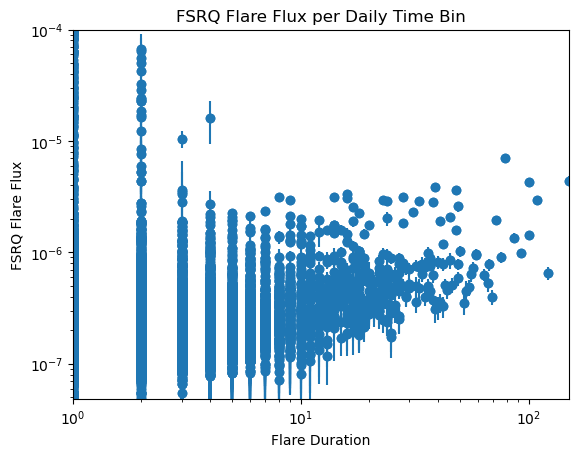

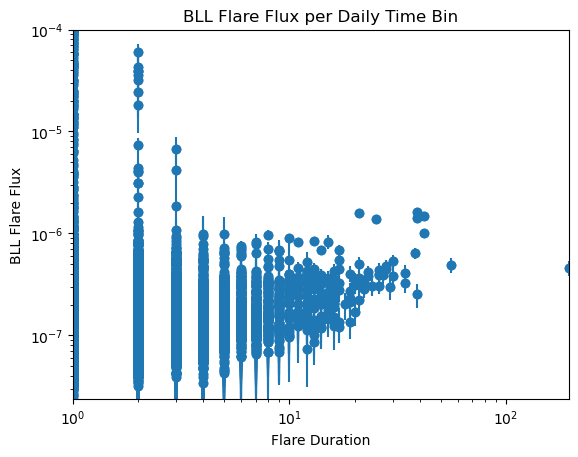

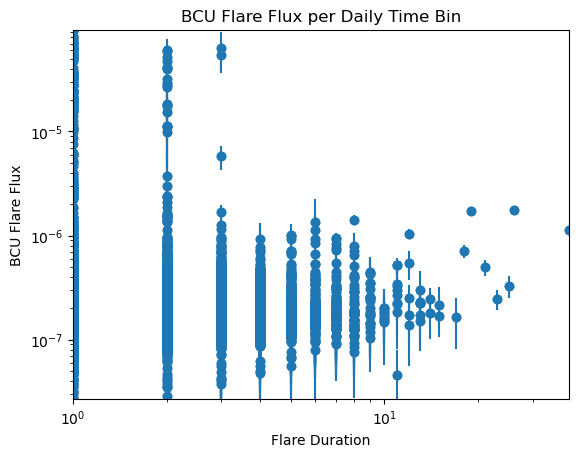

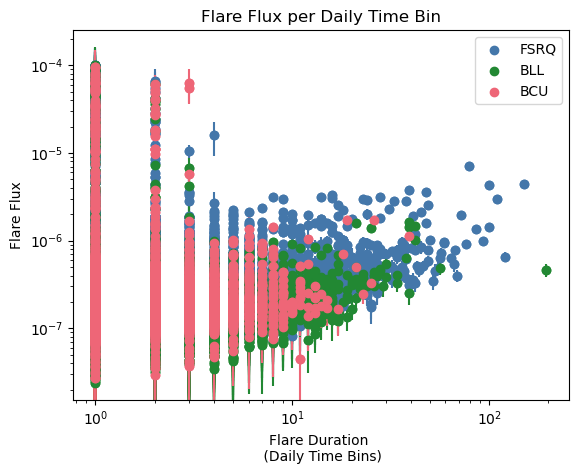

In [86]:
# Displays the dataframe to ensure everything is working as intended. Will omit in the future.
    #pd.DataFrame(data_array[sortedsource])

    # This block of code is where a majority of the plots will go.

    
fsrq_plot = fsrq_flares[fsrq_flares[:,0]!=0]

fsrq_ysize = fsrq_flares.size
fsrq_x = fsrq_plot[:,0]
fsrq_xmin = min(fsrq_x)
fsrq_xmax = max(fsrq_x)
fsrq_y = fsrq_plot[:,1]
fsrq_ymin = min(fsrq_y)
fsrq_ymax = max(fsrq_y)
fsrq_err=fsrq_plot[:,2]
plt.ylim([fsrq_ymin,fsrq_ymax])
plt.xlim([fsrq_xmin,fsrq_xmax])
plt.scatter(fsrq_x,fsrq_y)
plt.errorbar(fsrq_x,fsrq_y,yerr=fsrq_err,fmt = 'o')
plt.ylabel('FSRQ Flare Flux')
plt.xlabel('Flare Duration')
plt.title('FSRQ Flare Flux per Daily Time Bin')
plt.yscale('log')
plt.xscale('log')
plt.figure()

bll_plot = bll_flares[bll_flares[:,0]!=0]
bll_ysize = bll_flares.size
bll_x = bll_plot[:,0]
bll_xmin = min(bll_x)
bll_xmax = max(bll_x)
bll_y = bll_plot[:,1]
bll_ymin = min(bll_y)
bll_ymax = max(bll_y)
bll_err=bll_plot[:,2]
plt.ylim([bll_ymin,bll_ymax])
plt.xlim([bll_xmin,bll_xmax])
plt.scatter(bll_x,bll_y)
plt.errorbar(bll_x,bll_y,yerr=bll_err,fmt = 'o')
plt.ylabel('BLL Flare Flux')
plt.xlabel('Flare Duration')
plt.title('BLL Flare Flux per Daily Time Bin')
plt.yscale('log')
plt.xscale('log')
plt.figure()

bcu_plot = bcu_flares[bcu_flares[:,0]!=0]
ysize = bcu_flares.size
bcu_x = bcu_plot[:,0]
bcu_xmin = min(bcu_x)
bcu_xmax = max(bcu_x)
bcu_y = bcu_plot[:,1]
bcu_ymin = min(bcu_y)
bcu_ymax = max(bcu_y)
bcu_err=bcu_plot[:,2]
plt.ylim([bcu_ymin,bcu_ymax])
plt.xlim([bcu_xmin,bcu_xmax])
plt.scatter(bcu_x,bcu_y)
plt.errorbar(bcu_x,bcu_y,yerr=bcu_err,fmt = 'o')
plt.ylabel('BCU Flare Flux')
plt.xlabel('Flare Duration')
plt.title('BCU Flare Flux per Daily Time Bin')
plt.yscale('log')
plt.xscale('log')
plt.figure()

#Combined Graphic
plt.scatter(fsrq_x,fsrq_y,color='#4477AA',label='FSRQ')
plt.errorbar(fsrq_x,fsrq_y,yerr=fsrq_err,fmt = 'o',color='#4477AA')
plt.scatter(bll_x,bll_y,color='#228833',label='BLL')
plt.errorbar(bll_x,bll_y,yerr=bll_err,fmt = 'o',color='#228833')
plt.scatter(bcu_x,bcu_y,color='#EE6677',label='BCU')
plt.errorbar(bcu_x,bcu_y,yerr=bcu_err,fmt = 'o',color='#EE6677')
#print(int(np.mean([fsrq_ymin,bll_ymin,bcu_ymax])),int(np.mean([fsrq_ymax,bll_ymax,bcu_ymax])))
#print(int(np.mean([fsrq_xmin,bll_xmin,bcu_xmax])),int(np.mean([fsrq_xmax,bll_xmax,bcu_xmax])))
#plt.ylim([int(np.mean([fsrq_ymin,bll_ymin,bcu_ymax])),int(np.mean([fsrq_ymax,bll_ymax,bcu_ymax]))])
#plt.xlim([int(np.mean([fsrq_xmin,bll_xmin,bcu_xmax])),int(np.mean([fsrq_xmax,bll_xmax,bcu_xmax]))])
plt.legend()
plt.ylabel('Flare Flux')
plt.xlabel('Flare Duration \n (Daily Time Bins)')
plt.title('Flare Flux per Daily Time Bin')
plt.yscale('log')
plt.xscale('log')
#plt.xlim(0,60)
plt.show



In [16]:
pd.DataFrame(np.transpose([bll_x,bll_y]))
pd.DataFrame(bll_flares[bll_flares[:,0]!=0])

,0,1
0,1.0,1.050000e-07
1,1.0,5.460000e-08
2,1.0,5.260000e-08
3,3.0,6.290000e-08
4,1.0,5.910000e-08
...,...,...
17667,1.0,6.520000e-08
17668,1.0,7.530000e-08
17669,1.0,5.240000e-08
17670,2.0,6.870000e-08


In [45]:
cadence_df[((cadence_df['source_name']=='4FGL J0003.3-1928') & (cadence_df['photon_flux_error2']!=-3333))].reset_index(drop = True)
#np.mean(cadence_df[cadence_df['source_name']=='4FGL J0003.3-1928']['photon_flux_error2'])

,Unnamed: 0,source_name,cadence,tmin,tmax,photon_flux2,photon_flux_error2,photon_index2,return_code2,ts2
0,158607,4FGL J0003.3-1928,weekly,257126401,257731201,5.230000e-08,3.300000e-08,2.92,0.0,9.97
1,469705,4FGL J0003.3-1928,weekly,291600001,292204801,3.150000e-09,2.320000e-09,0.45,0.0,11.81
2,484957,4FGL J0003.3-1928,weekly,293414401,294019201,2.970000e-08,2.530000e-08,2.27,0.0,7.06
3,567305,4FGL J0003.3-1928,weekly,302486401,303091201,1.200000e-07,7.580000e-08,5.00,0.0,6.23
4,671002,4FGL J0003.3-1928,weekly,313977601,314582401,2.840000e-08,2.050000e-08,2.83,0.0,5.30
...,...,...,...,...,...,...,...,...,...,...
70,3380927,4FGL J0003.3-1928,weekly,615168001,615772801,2.910000e-08,2.080000e-08,2.91,0.0,4.13
71,3559352,4FGL J0003.3-1928,weekly,635126401,635731201,1.800000e-07,8.470000e-08,4.33,102.0,9.11
72,3841477,4FGL J0003.3-1928,weekly,666576001,667180801,7.290000e-08,6.330000e-08,2.52,0.0,5.87
73,3885702,4FGL J0003.3-1928,weekly,671414401,672019201,3.970000e-08,2.590000e-08,3.13,0.0,5.12
